In [1]:
%matplotlib notebook

from rlsm.datasets import load_spanish_highschool
from rlsm import ReciprocityLSM

## Enemy Network

In [14]:
Y, features = load_spanish_highschool()

In [15]:
Y = (Y < 0).astype(float)
d_out = Y.sum(axis=1)
d_in = Y.sum(axis=0)
ids = np.logical_or(d_out > 0, d_in > 0)
Y = Y[ids][:, ids]

In [16]:
features

,course,cluster,sex
0,1,E,Female
1,1,E,Female
2,1,E,Female
3,1,E,Female
4,1,E,Male
...,...,...,...
233,2,DPMAR,Male
234,2,DPMAR,Female
235,2,DPMAR,Male
236,2,B,Male


In [22]:
model = ReciprocityLSM(n_features=2, reciprocity_type='distance', random_state=42)
model.sample(Y, n_warmup=2000, n_samples=2000)

sample: 100%|███████████████████████████████████████████████████████████████████| 4000/4000 [04:16<00:00, 15.58it/s, 127 steps of size 4.49e-02. acc. prob=0.84]


In [23]:
model.auc_

0.9922850423100099

In [24]:
model.waic()

2564.654052734375

In [25]:
model.print_summary()


                  mean       std    median      5.0%     95.0%     n_eff     r_hat
     a_sigma      4.50      0.89      4.39      2.98      5.78    610.80      1.00
    ab_sigma     -0.50      0.30     -0.50     -0.97      0.00    606.61      1.00
     b_sigma      0.78      0.18      0.77      0.49      1.08    799.26      1.00
   dist_coef      1.12      0.23      1.13      0.77      1.50    894.79      1.00
  recip_coef     -0.99      0.79     -0.97     -2.22      0.32    874.60      1.00
     u_sigma      3.53      0.30      3.53      3.05      4.05    249.42      1.00

Number of divergences: 124


<IPython.core.display.Javascript object>


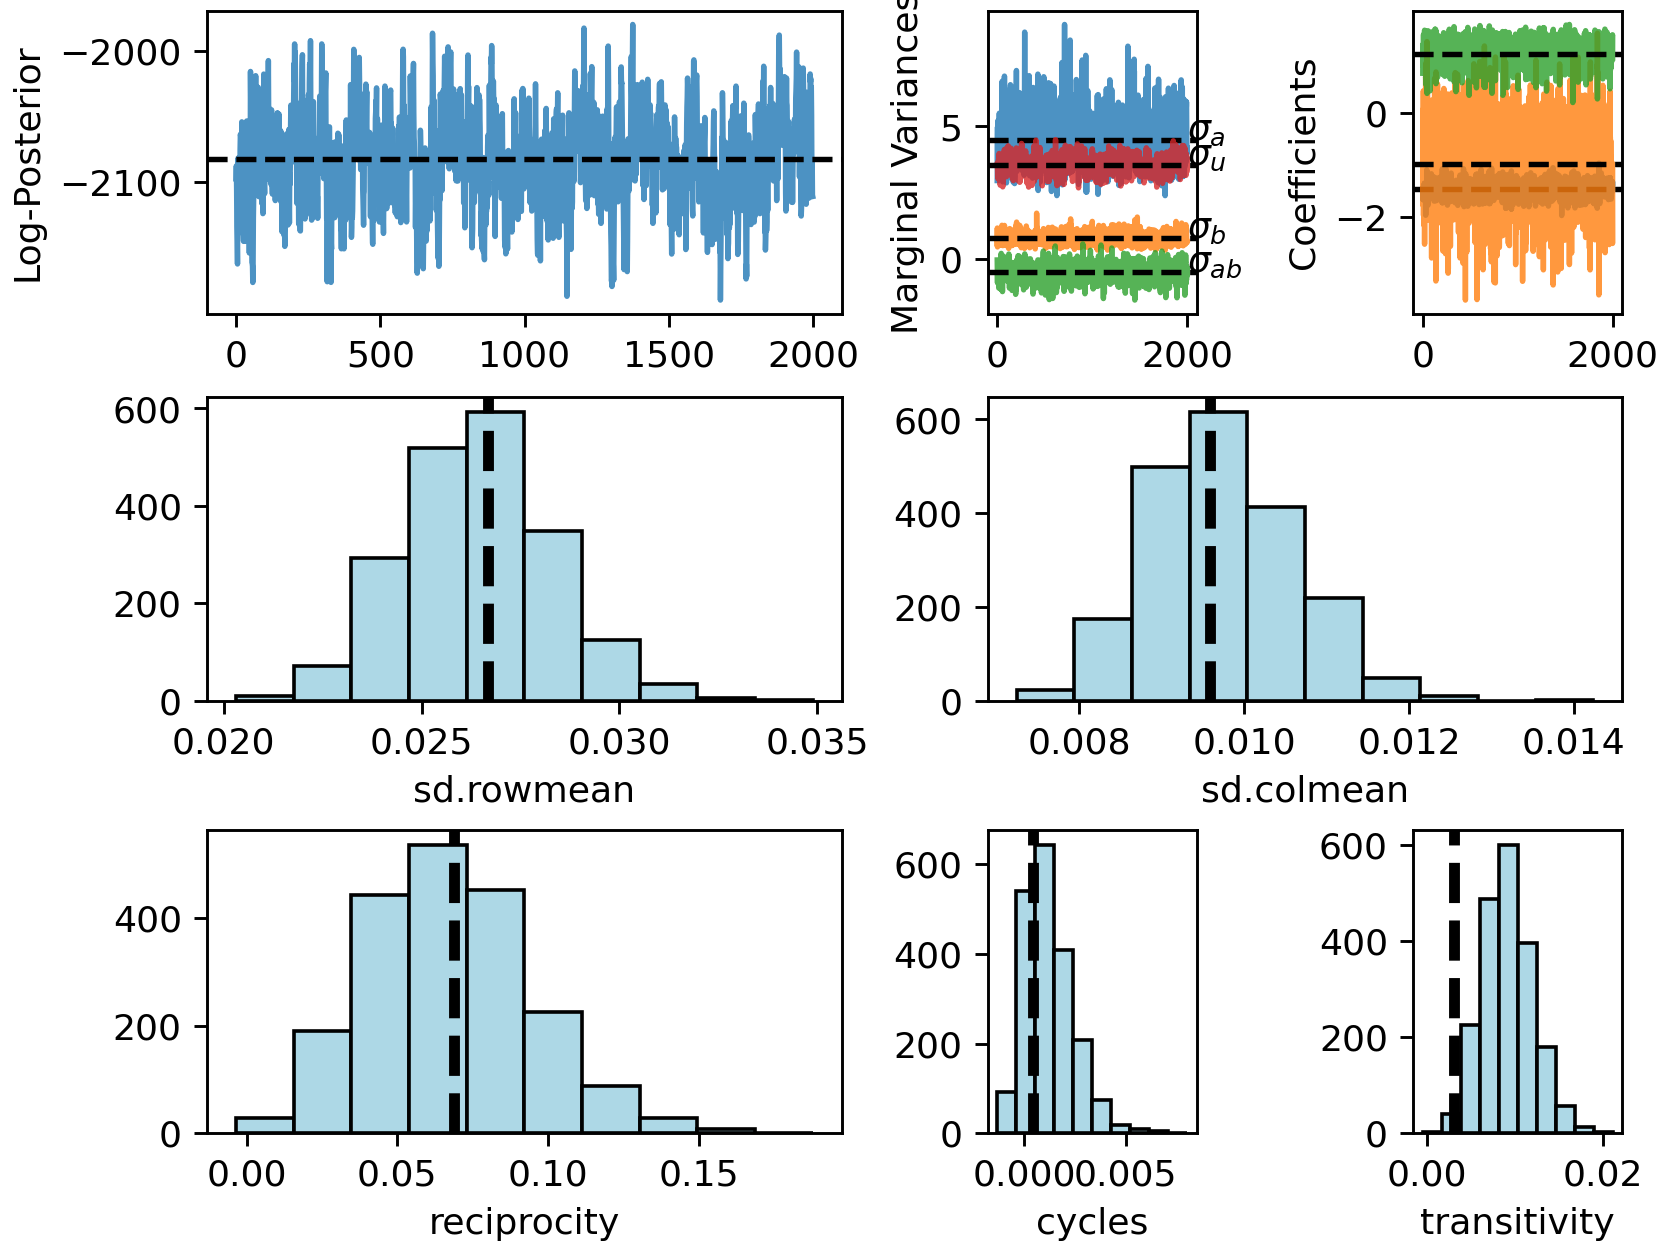

{'A': <Axes: label='A', ylabel='Log-Posterior'>,
 'B': <Axes: label='B', ylabel='Marginal Variances'>,
 'C': <Axes: label='C', ylabel='Coefficients'>,
 'D': <Axes: label='D', xlabel='sd.rowmean'>,
 'E': <Axes: label='E', xlabel='sd.colmean'>,
 'F': <Axes: label='F', xlabel='reciprocity'>,
 'G': <Axes: label='G', xlabel='cycles'>,
 'H': <Axes: label='H', xlabel='transitivity'>}

In [26]:
model.plot()

In [17]:
gamma = model.samples_['gamma'].mean(axis=0)
ids = np.argsort(np.abs(gamma))[::-1]
gamma[ids]

KeyError: 'gamma'

In [9]:
from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder().fit(features['cluster'])
clust = enc.transform(features['cluster'])

In [76]:
Y.shape

(237, 237)

In [16]:
gamma = model.samples_['gamma'].mean(axis=0)
gm =(gamma - np.min(gamma)) / (np.max(gamma) - np.min(gamma))

KeyError: 'gamma'

<IPython.core.display.Javascript object>


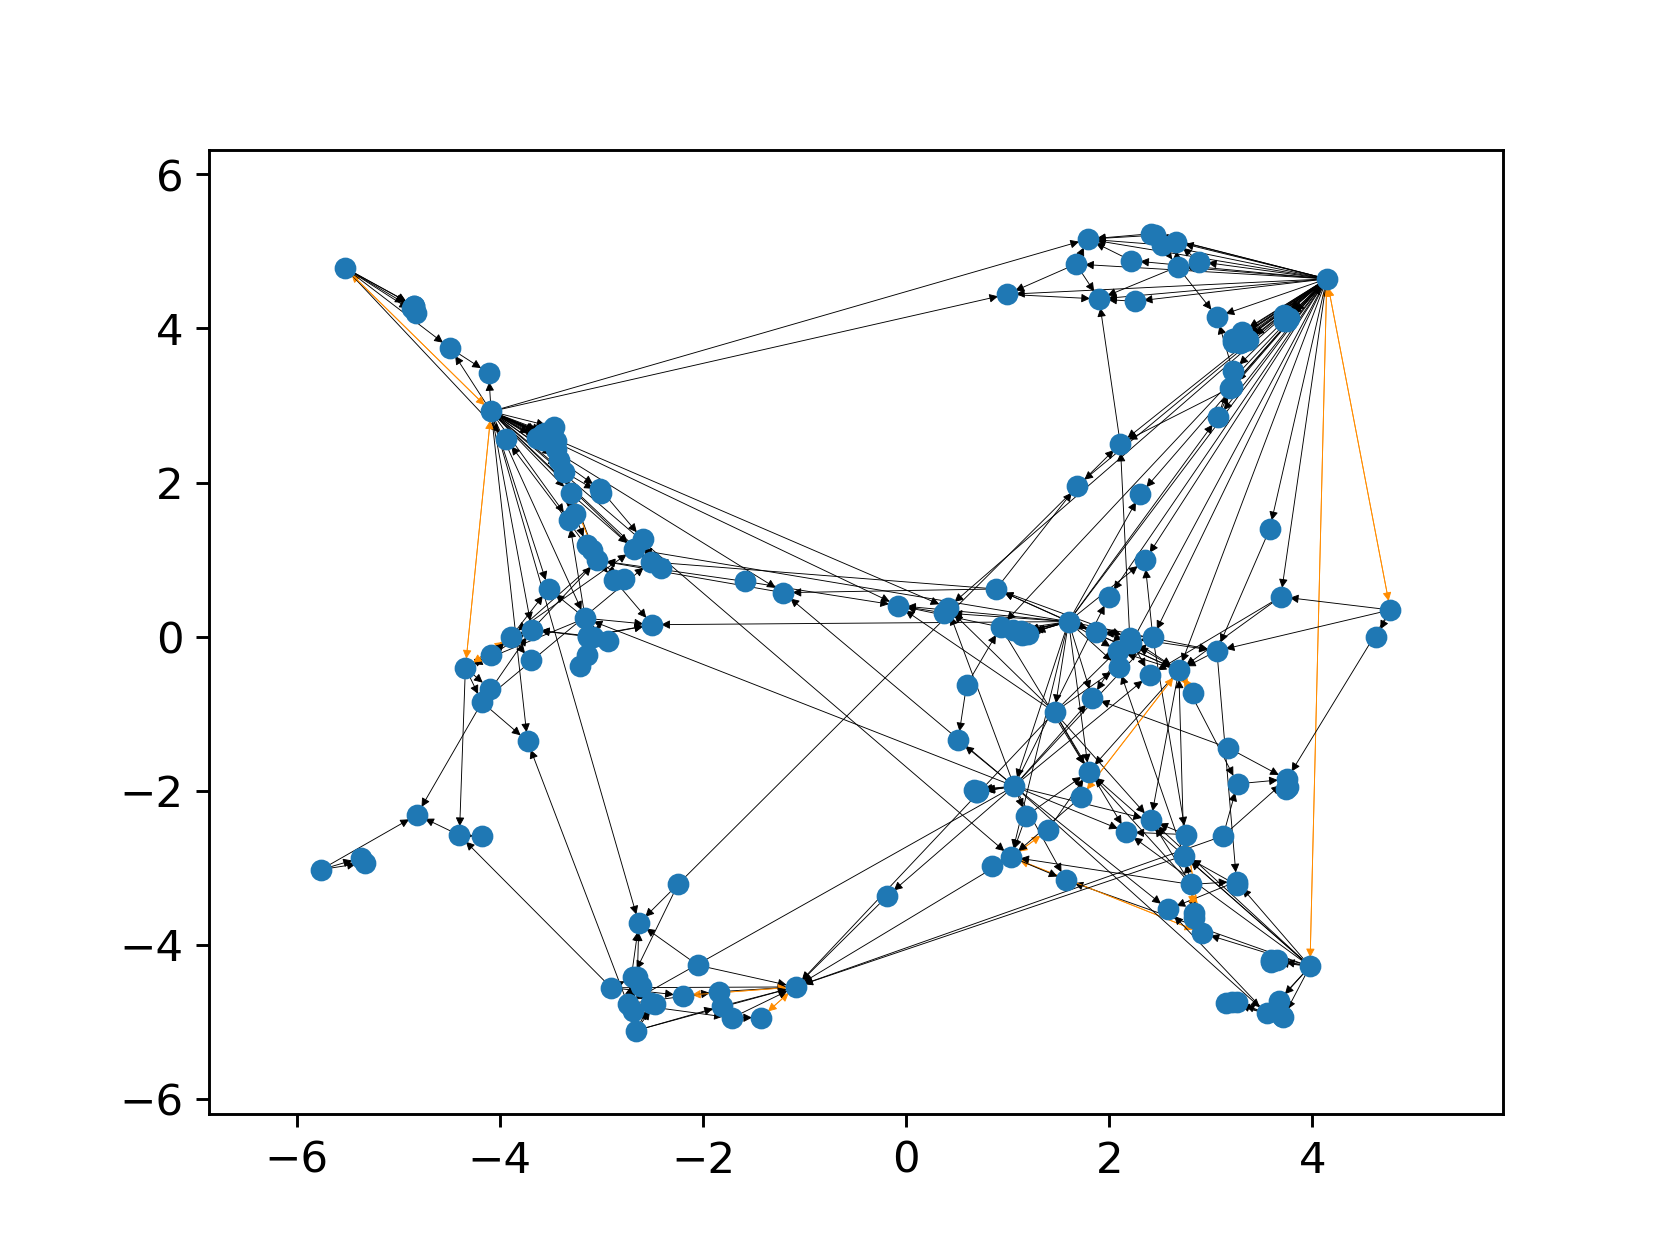

In [27]:
import networkx as nx

colors = np.asarray(["tomato", "steelblue", "goldenrod"])
#colors = np.asarray(["red", "cyan", "purple", "yellow","pink", 'orange'])
g = nx.from_numpy_array(Y, create_using=nx.DiGraph)
pos = {k : model.U_[k, :2] for k in range(Y.shape[0])}
elist = list(nx.to_edgelist(g))
ecolor = ['darkorange' if Y[e[1], e[0]] else 'black' for e in elist]
nx.draw_networkx(g, pos, 
                 #node_color=colors[(gamma < 0).astype(int)],
                 #node_color=colors[features['course'].values[ids] - 1],
                 #node_color='steelblue',
                 edge_color=ecolor, width=0.25, with_labels=False,
                 arrowsize=5,
                 node_size=25)
plt.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True,
                labelsize=12)

# Friendship Network

In [2]:
Y, features = load_spanish_highschool()

In [3]:
Y = (Y > 0).astype(float)
d_out = Y.sum(axis=1)
d_in = Y.sum(axis=0)
ids = np.logical_or(d_out > 0, d_in > 0)
Y = Y[ids][:, ids]

\begin{align}
p(\mathbf{Y}) &= \prod_{i<j} p(y_{ij}, y_{ji}) \\
p(y_{ij}, y_{ji}) &\propto \exp(\mu_{ij}y_{ij} + \mu_{ji} y_{ji} + \rho_{ij} y_{ij}y_{ji})\\
\mu_{ij} &= a_i + b_j - |z_i - z_j| \\
\rho_{ij} &= \rho + \phi |z_i - z_j|
\end{align}

\begin{align}
&\text{logit}[p(Y_{ij} = 1 | Y_{ji} = y_{ji})] = a_i + b_j - |z_i - z_j| + (\rho + \phi |z_i - z_j|)y_{ji} \\
&\text{logit}[(Y_{ij} = 1 | Y_{ji} = y_{ji})] = \begin{cases} 
a_i + b_j - |z_i - z_j| & y_{ji} = 0 \\
a_i + b_j + \rho + (\phi - 1) |z_i - z_j| & y_{ji} = 1 
\end{cases}\\
&\log \frac{\text{odds}(Y_{ij} = 1 | Y_{ji} = 1)}{\text{odds}(Y_{ij} = 1 | Y_{ji} = 0)} = \rho + \phi |z_i - z_j| 
\end{align}

In [4]:
model_pos = ReciprocityLSM(n_features=2, reciprocity_type='distance', random_state=42)
model_pos.sample(Y, n_warmup=2000, n_samples=2000)

sample: 100%|██████████████| 4000/4000 [04:08<00:00, 16.12it/s, 63 steps of size 4.98e-02. acc. prob=0.82]


In [5]:
model_pos.print_summary()

AUC: 0.962, WAIC: 11982.578

                  mean       std    median      5.0%     95.0%     n_eff     r_hat
     a_sigma      4.05      0.52      4.01      3.22      4.88    135.46      1.00
    ab_sigma     -0.15      0.15     -0.15     -0.38      0.10    248.44      1.01
     b_sigma      0.69      0.10      0.69      0.53      0.85    413.95      1.00
   dist_coef     -0.34      0.08     -0.34     -0.48     -0.21    699.06      1.01
  recip_coef      2.07      0.16      2.06      1.81      2.34    625.10      1.01
     u_sigma      3.50      0.13      3.51      3.29      3.71    263.47      1.00

Number of divergences: 275


<IPython.core.display.Javascript object>


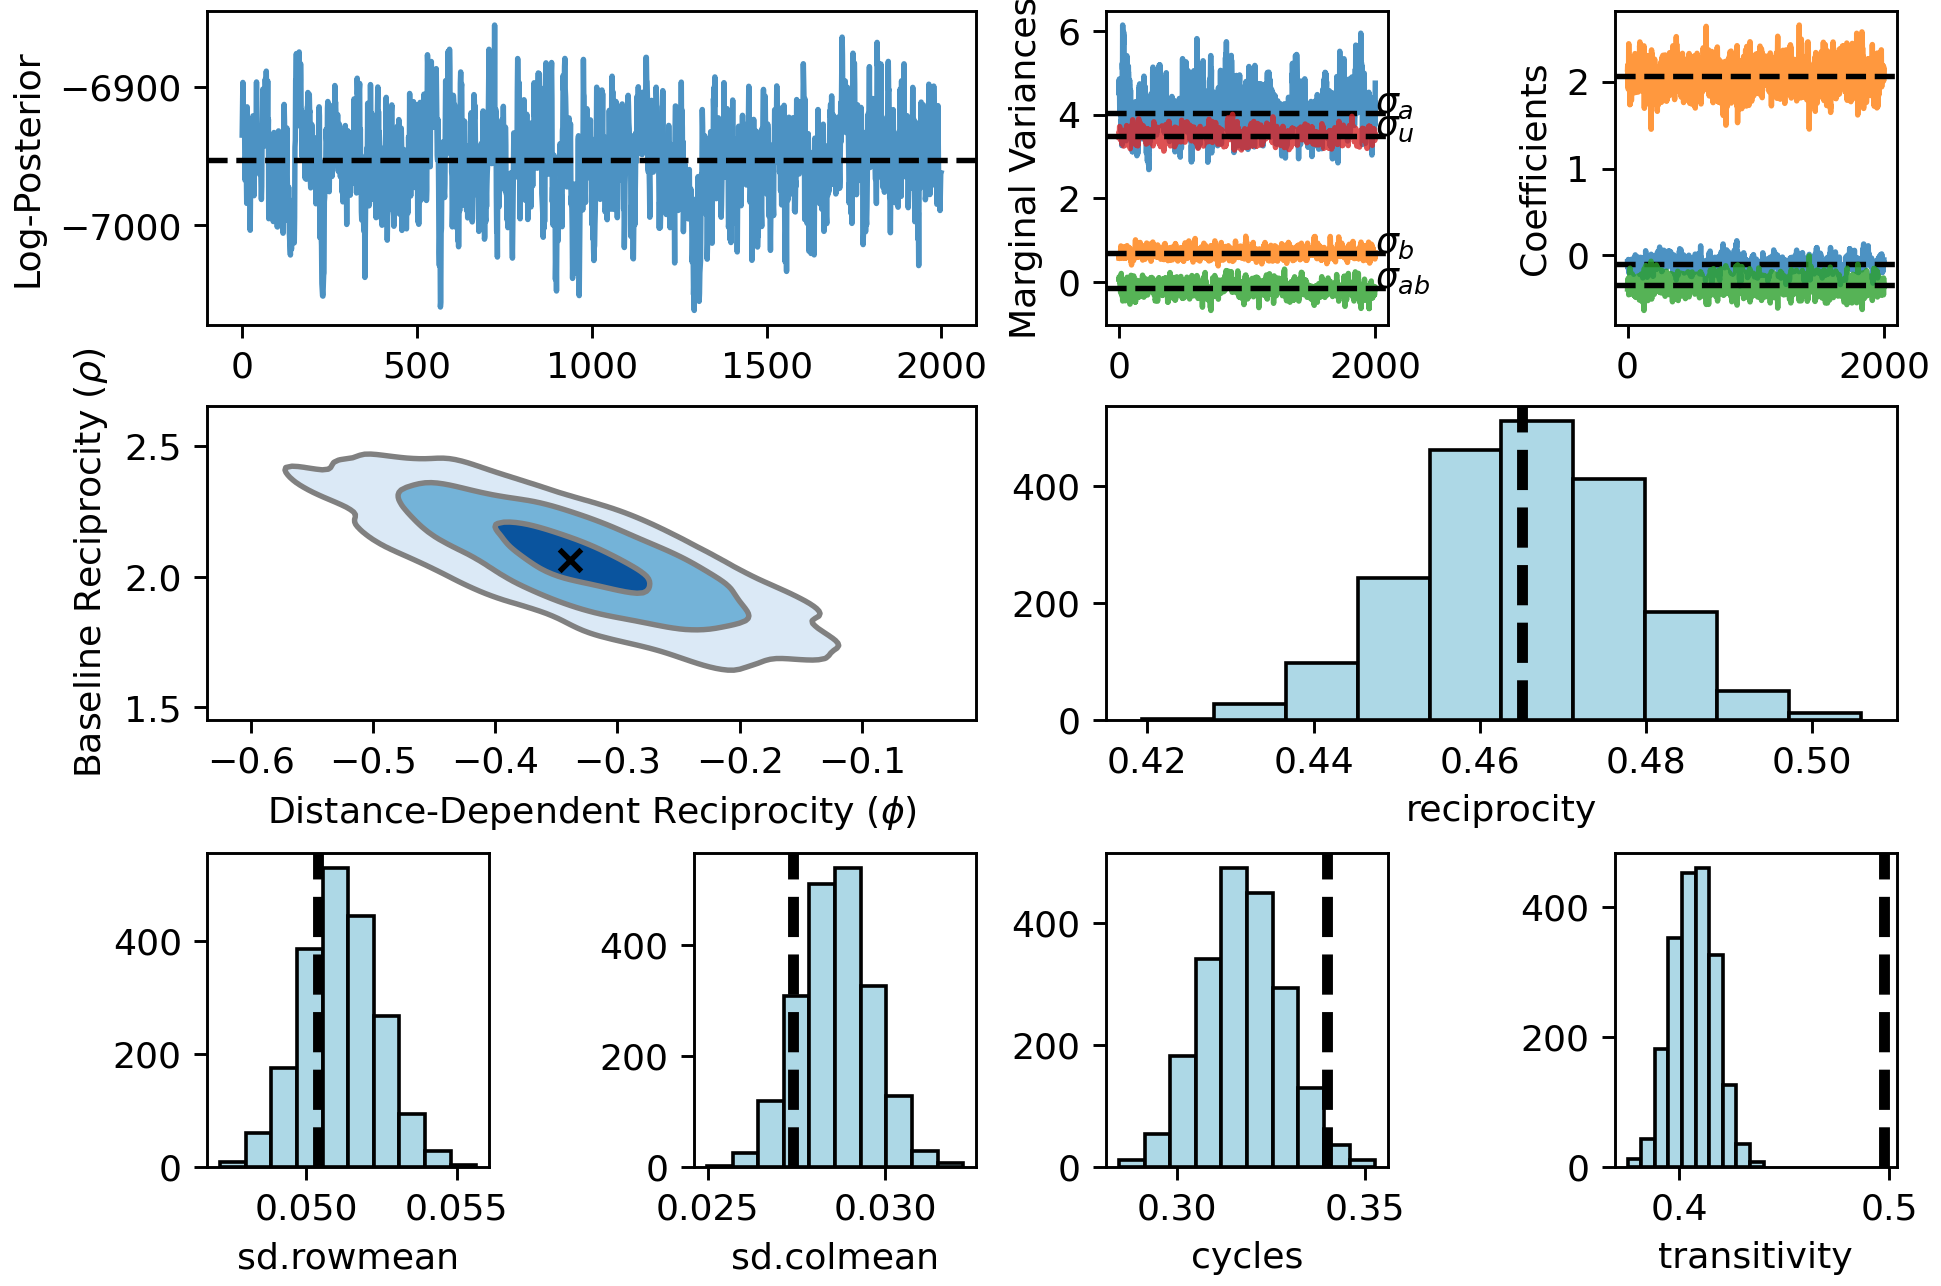

{'A': <Axes: label='A', ylabel='Log-Posterior'>,
 'B': <Axes: label='B', ylabel='Marginal Variances'>,
 'C': <Axes: label='C', ylabel='Coefficients'>,
 'D': <Axes: label='D', xlabel='Distance-Dependent Reciprocity ($\\phi$)', ylabel='Baseline Reciprocity ($\\rho$)'>,
 'E': <Axes: label='E', xlabel='reciprocity'>,
 'F': <Axes: label='F', xlabel='sd.rowmean'>,
 'G': <Axes: label='G', xlabel='sd.colmean'>,
 'H': <Axes: label='H', xlabel='cycles'>,
 'I': <Axes: label='I', xlabel='transitivity'>}

In [6]:
model_pos.plot()

<IPython.core.display.Javascript object>


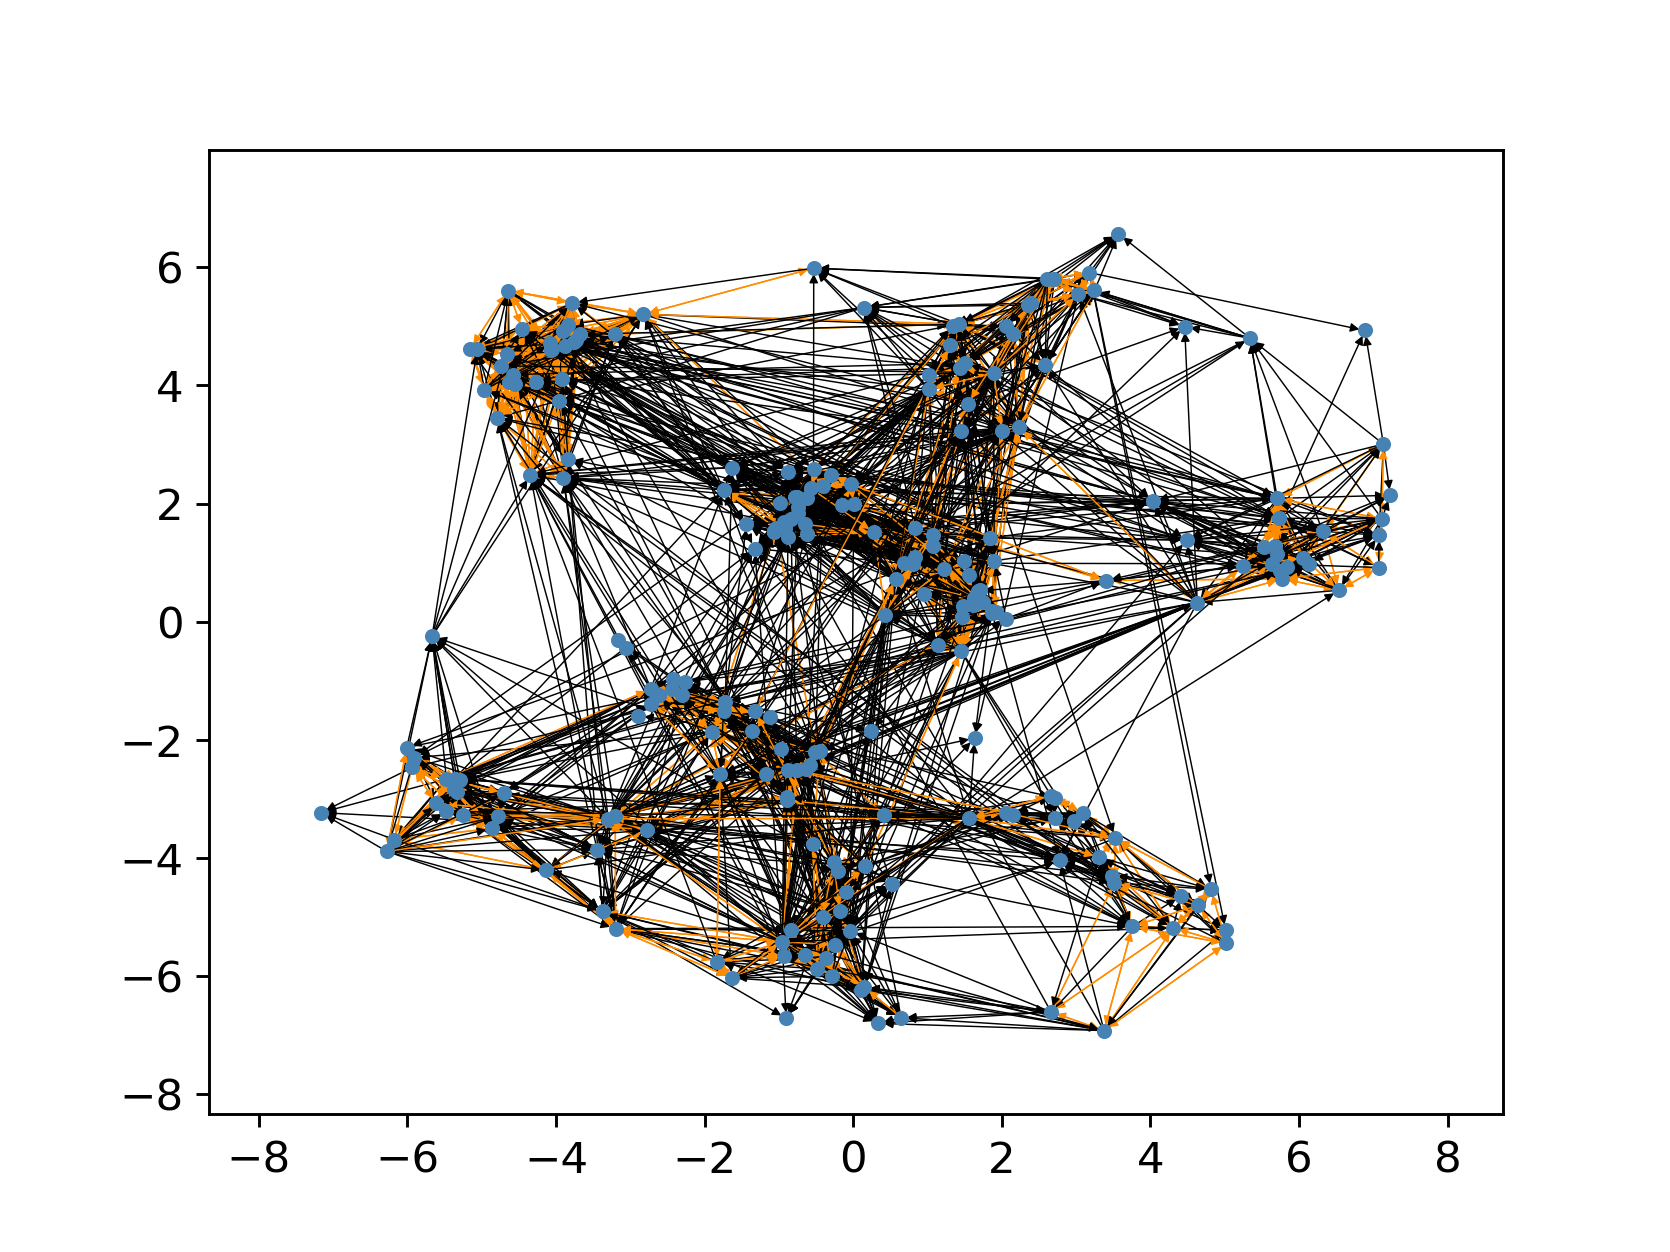

In [9]:
import networkx as nx

colors = np.asarray(["tomato", "steelblue", "goldenrod"])
#colors = np.asarray(["red", "cyan", "purple", "yellow","pink", 'orange'])
g = nx.from_numpy_array(Y, create_using=nx.DiGraph)
pos = {k : model_pos.U_[k] for k in range(Y.shape[0])}
elist = list(nx.to_edgelist(g))
ecolor = ['darkorange' if Y[e[1], e[0]] else 'black' for e in elist]
nx.draw_networkx(g, pos, 
                 #node_color=colors[clust],
                 #node_color=colors[features['course'].values[ids] - 1],
                 node_color='steelblue',
                 #node_color=colors[(gamma < 0).astype(int)],
                 edge_color=ecolor, width=0.4, with_labels=False,
                 arrowsize=5,
                 node_size=10)
plt.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True,
                labelsize=12)